In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pickle as pkl
import numpy as np

In [7]:
mapa = gpd.read_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/miZMVMmap/miZMVM.shp", 
                    encoding = 'latin')

In [100]:
data = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/viajes/viajes_entre_semana_por_cve_umun_2017.csv",
                  dtype={'origen':str})

In [101]:
data.set_index('origen', inplace=True)

In [97]:
data_inside = pd.Series([data.iloc[i, i] for i in range(len(data))], index = data.index)

In [91]:
data_out = data.copy()

for i in range(47):
    data_noinnercommuting.iloc[i, i] = 0

In [94]:
salidas = data_out.sum(axis = 1)

In [103]:
mapa['out'] = mapa['cve_umun'].apply(lambda x: salidas[x])

In [104]:
mapa['in'] = mapa['cve_umun'].apply(lambda x: data_inside[x])

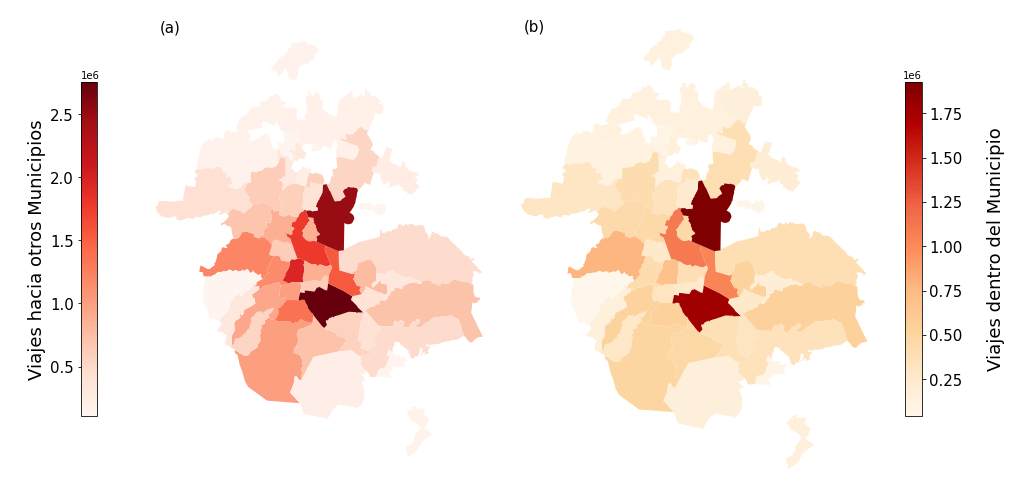

In [136]:
fig, ax = plt.subplots(1, 2, figsize = (14, 8))


mapa.plot(ax = ax[0], column = 'out', cmap ="Reds")
mapa.plot(ax = ax[1], column = 'in', cmap ="OrRd")

ax[0].axis('off')
ax[1].axis('off')

vmin, vmax = mapa['out'].min(), mapa['out'].max()

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.04, ax = ax[0], location = 'left')
# parámetros de la cbar
cbar.ax.tick_params(labelsize=15) 
cbar.set_label(label='\nViajes hacia otros Municipios', fontsize=18)

vmin, vmax = mapa['in'].min(), mapa['in'].max()

sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.04, ax = ax[1], location = 'right')
# parámetros de la cbar
cbar.ax.tick_params(labelsize=15) 
cbar.set_label(label='\nViajes dentro del Municipio', fontsize=18)

ax[0].annotate('(a)', xy=(20, 445), xycoords = 'axes points', fontsize = 15)
ax[1].annotate('(b)', xy=(20, 460), xycoords = 'axes points', fontsize = 15)


fig.tight_layout(pad = 0.5)
plt.show()